In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

! pip install git+https://github.com/openai/CLIP.git
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import clip
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-rzjzb77z
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-rzjzb77z
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 3.1 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369398 sha256=2247ff039c14d11c9282818245e956a55b0be220f1900d775412565f8a0e4623
  Stored in directory: /tmp/pip-ephem-wheel-cache-mc1nxviv/wheels/c8/e4/e1/11374c111387672fc2068dfbe0d4b424cb9cdd1b2e184a71b5
Successfully built clip
Mounted at /content/drive


In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import CLIP
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 71.5MiB/s]


In [4]:
tokenizer = clip.tokenize

# Embed the attributes

In [5]:
attributes = pd.read_csv("/content/drive/MyDrive/Birds/attributes.txt", sep=' ',header = None)
attributes[1] = attributes[1].map(lambda x: x.replace("_", " ").replace("has ", "").replace("::", " "))
attributes = attributes[1].values

attributes_embedded = []
for attribute in attributes:
  attribute = tokenizer([attribute],truncate=True).to(device)
  attributes_embedded.append(clip_model.encode_text(attribute))

attributes = dict(zip(np.arange(1,313),attributes))

In [6]:
attributes_embedded = torch.stack(attributes_embedded).reshape((312,512))

# Embed the birds

In [7]:
images = pd.read_csv("/content/drive/MyDrive/Birds/CUB_200_2011/images.txt", sep=' ',header = None)
images[1] = images[1].map(lambda x: x.replace("_", " ").replace("has ", "").replace("::", " "))
images["class_number"] = images[1].map(lambda x: int(x.split(".")[0]))
images["class_text"] = images[1].map(lambda x: x.split(".")[1].split("/")[0])
images = images["class_text"]
images = images.to_dict()

In [8]:
data_gen = pd.read_csv('/content/drive/MyDrive/Birds/CUB_200_2011/attributes/image_attribute_labels.txt', header = None)

In [9]:
image_to_text_dict = dict()

In [ ]:
for index, row in data_gen.iterrows():
  print(index)
  split_text = row[0].split(" ")
  image_id = int(split_text[0])
  if image_id not in image_to_text_dict:
  #  image_to_text_dict[image_id] = str(images[image_id])
    image_to_text_dict[image_id] = " " + str(attributes[int(split_text[1])])
    continue
  if int(split_text[2]) != 1 or int(split_text[3]) != 4 :
    continue
  image_to_text_dict[image_id] += " " + str(attributes[int(split_text[1])])

# Compare score vectors and embeddings

In [30]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import seaborn as sns

# score matrix
score_matrix = []

# add each score for PCA matrix
for key, value in image_to_text_dict.items():
  print(key)
  text = tokenizer(image_to_text_dict[key],truncate=True).to(device)
  text_embed = clip_model.encode_text(text).detach()
  score = attributes_embedded @ text_embed.T
  score = (score.cpu().detach().numpy()).flatten()
  score_matrix.append(score)

Streaming output truncated to the last 5000 lines.
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978

In [12]:

# create PCA
#pca = PCA(n_components = 32)
#pca.fit(score_matrix)
# score text 1
#score_1 = pca.transform(score_matrix[111].reshape(312,1).T)
# score text 2
#score_2 = pca.transform(score_matrix[111].reshape(312,1).T)
#cosine_similarity(score_1, score_2)
#score_matrix_reduced = pca.transform(score_matrix)



PCA(n_components=32)

In [33]:
score_matrix = np.array(score_matrix)

In [34]:
tsne_score = TSNE().fit_transform(score_matrix)

In [35]:
df = pd.DataFrame(tsne_score)
df["colors"] = ""
df["colors"] = list(images.values())
#df = df.iloc[:-3]
#df

In [36]:
df

,0,1,colors
0,-58.286331,43.200283,Black footed Albatross
1,34.331303,-17.484320,Black footed Albatross
2,-60.944973,-16.673035,Black footed Albatross
3,-57.965679,-14.430573,Black footed Albatross
4,40.674290,18.475750,Black footed Albatross
...,...,...,...
11783,-60.720280,19.755136,Common Yellowthroat
11784,-15.302130,27.964077,Common Yellowthroat
11785,-13.306260,-10.095273,Common Yellowthroat
11786,-47.933739,-15.720429,Common Yellowthroat


<Axes: xlabel='0', ylabel='1'>

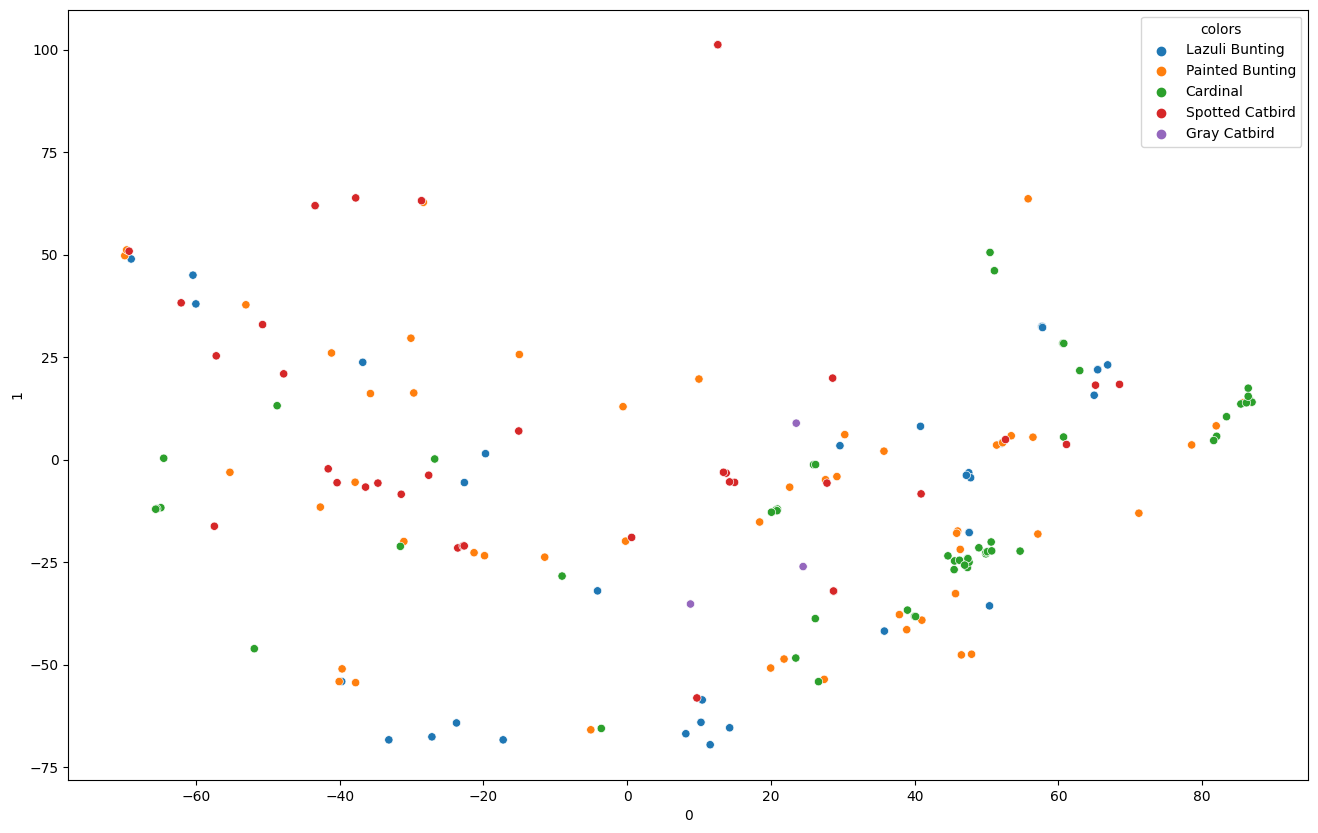

In [40]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x = 0,
    y = 1,
    data = df.iloc[800:1000],
    hue = "colors"
)